https://www.kaggle.com/code/jadatravu/outlier-detection-for-categorical-data

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
df = pd.read_csv('global_emissions.csv')

In [252]:
df

,Year,Country.Name,Country.Code,Country.GDP,Country.Population,Emissions.Production.CH4,Emissions.Production.N2O,Emissions.Production.CO2.Cement,Emissions.Production.CO2.Coal,Emissions.Production.CO2.Gas,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
0,1992,Afghanistan,AFG,1.267754e+10,14485543,7.13,2.89,0.046,0.022,0.363,0.927,0.022,0.000000e+00,1.379,0.01,0.00,0.01,0.01,0.01,0.01
1,1993,Afghanistan,AFG,9.834581e+09,15816601,7.21,2.93,0.047,0.018,0.352,0.894,0.022,0.000000e+00,1.333,0.01,0.00,0.01,0.01,0.01,0.01
2,1994,Afghanistan,AFG,7.919857e+09,17075728,7.47,2.76,0.047,0.015,0.338,0.860,0.022,2.220446e-16,1.282,0.01,0.00,0.01,0.01,0.01,0.01
3,1995,Afghanistan,AFG,1.230753e+10,18110662,7.83,2.88,0.047,0.015,0.322,0.824,0.022,2.220446e-16,1.230,0.01,0.00,0.01,0.01,0.01,0.01
4,1996,Afghanistan,AFG,1.207013e+10,18853444,8.67,3.12,0.047,0.007,0.308,0.780,0.022,1.000000e-03,1.165,0.01,0.00,0.01,0.01,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2014,Vietnam,VNM,5.098024e+11,91713848,84.93,23.48,32.694,70.517,19.599,46.196,0.000,0.000000e+00,169.006,2.19,0.47,0.29,0.40,0.00,0.48
2480,2015,Vietnam,VNM,5.439311e+11,92677080,83.85,25.91,34.298,83.191,20.463,55.052,0.000,0.000000e+00,193.004,2.39,0.57,0.30,0.46,0.00,0.54
2481,2016,Vietnam,VNM,5.776835e+11,93640440,81.85,24.82,36.822,81.561,20.368,54.015,0.000,0.000000e+00,192.766,2.49,0.57,0.29,0.45,0.00,0.54
2482,2017,Vietnam,VNM,6.177747e+11,94600640,81.28,24.89,42.735,77.680,17.877,56.957,0.000,0.000000e+00,195.249,2.85,0.54,0.25,0.47,0.00,0.54


In [253]:
data_number = df.select_dtypes(include=[np.number])

In [254]:
data_number

,Year,Country.GDP,Country.Population,Emissions.Production.CH4,Emissions.Production.N2O,Emissions.Production.CO2.Cement,Emissions.Production.CO2.Coal,Emissions.Production.CO2.Gas,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
0,1992,1.267754e+10,14485543,7.13,2.89,0.046,0.022,0.363,0.927,0.022,0.000000e+00,1.379,0.01,0.00,0.01,0.01,0.01,0.01
1,1993,9.834581e+09,15816601,7.21,2.93,0.047,0.018,0.352,0.894,0.022,0.000000e+00,1.333,0.01,0.00,0.01,0.01,0.01,0.01
2,1994,7.919857e+09,17075728,7.47,2.76,0.047,0.015,0.338,0.860,0.022,2.220446e-16,1.282,0.01,0.00,0.01,0.01,0.01,0.01
3,1995,1.230753e+10,18110662,7.83,2.88,0.047,0.015,0.322,0.824,0.022,2.220446e-16,1.230,0.01,0.00,0.01,0.01,0.01,0.01
4,1996,1.207013e+10,18853444,8.67,3.12,0.047,0.007,0.308,0.780,0.022,1.000000e-03,1.165,0.01,0.00,0.01,0.01,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2014,5.098024e+11,91713848,84.93,23.48,32.694,70.517,19.599,46.196,0.000,0.000000e+00,169.006,2.19,0.47,0.29,0.40,0.00,0.48
2480,2015,5.439311e+11,92677080,83.85,25.91,34.298,83.191,20.463,55.052,0.000,0.000000e+00,193.004,2.39,0.57,0.30,0.46,0.00,0.54
2481,2016,5.776835e+11,93640440,81.85,24.82,36.822,81.561,20.368,54.015,0.000,0.000000e+00,192.766,2.49,0.57,0.29,0.45,0.00,0.54
2482,2017,6.177747e+11,94600640,81.28,24.89,42.735,77.680,17.877,56.957,0.000,0.000000e+00,195.249,2.85,0.54,0.25,0.47,0.00,0.54


In [255]:
data_object = df.select_dtypes(include='object')

In [256]:
data_object

,Country.Name,Country.Code
0,Afghanistan,AFG
1,Afghanistan,AFG
2,Afghanistan,AFG
3,Afghanistan,AFG
4,Afghanistan,AFG
...,...,...
2479,Vietnam,VNM
2480,Vietnam,VNM
2481,Vietnam,VNM
2482,Vietnam,VNM


In [257]:
df.columns

Index(['Year', 'Country.Name', 'Country.Code', 'Country.GDP',
       'Country.Population', 'Emissions.Production.CH4',
       'Emissions.Production.N2O', 'Emissions.Production.CO2.Cement',
       'Emissions.Production.CO2.Coal', 'Emissions.Production.CO2.Gas',
       'Emissions.Production.CO2.Oil', 'Emissions.Production.CO2.Flaring',
       'Emissions.Production.CO2.Other', 'Emissions.Production.CO2.Total',
       'Emissions.Global Share.CO2.Cement', 'Emissions.Global Share.CO2.Coal',
       'Emissions.Global Share.CO2.Gas', 'Emissions.Global Share.CO2.Oil',
       'Emissions.Global Share.CO2.Flaring',
       'Emissions.Global Share.CO2.Total'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa5d8ed4970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa5d8eb0df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa5d8ed46d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa5d8eb08e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa5d8eb0a60>],
 'means': []}

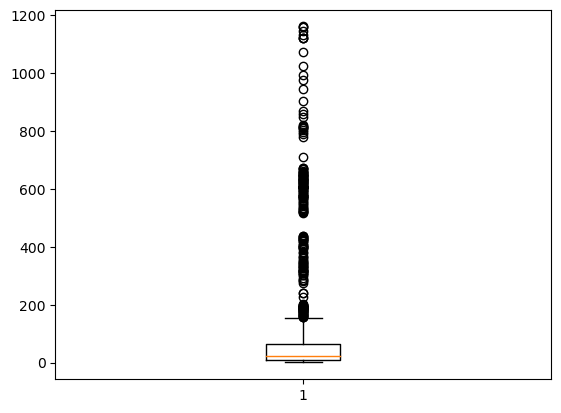

In [258]:
plt.boxplot(df["Emissions.Production.CH4"])

(array([2174.,  146.,   28.,   27.,   24.,   57.,    8.,    7.,    4.,
           9.]),
 array([5.20000e-01, 1.16610e+02, 2.32700e+02, 3.48790e+02, 4.64880e+02,
        5.80970e+02, 6.97060e+02, 8.13150e+02, 9.29240e+02, 1.04533e+03,
        1.16142e+03]),
 <BarContainer object of 10 artists>)

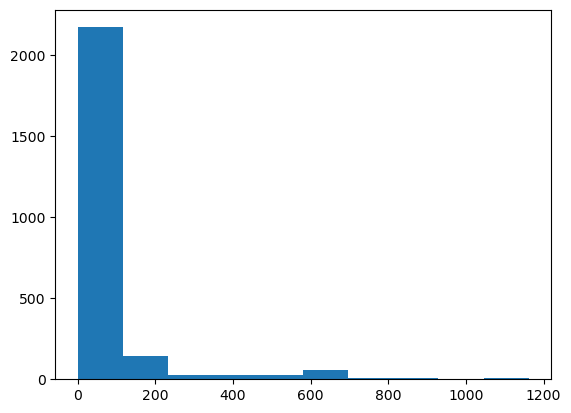

In [259]:
plt.hist(df["Emissions.Production.CH4"])

In [269]:
df_remo_outlier = df[df["Emissions.Production.CH4"]<90]

In [270]:
df_remo_outlier

,Year,Country.Name,Country.Code,Country.GDP,Country.Population,Emissions.Production.CH4,Emissions.Production.N2O,Emissions.Production.CO2.Cement,Emissions.Production.CO2.Coal,Emissions.Production.CO2.Gas,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
0,1992,Afghanistan,AFG,1.267754e+10,14485543,7.13,2.89,0.046,0.022,0.363,0.927,0.022,0.000000e+00,1.379,0.01,0.00,0.01,0.01,0.01,0.01
1,1993,Afghanistan,AFG,9.834581e+09,15816601,7.21,2.93,0.047,0.018,0.352,0.894,0.022,0.000000e+00,1.333,0.01,0.00,0.01,0.01,0.01,0.01
2,1994,Afghanistan,AFG,7.919857e+09,17075728,7.47,2.76,0.047,0.015,0.338,0.860,0.022,2.220446e-16,1.282,0.01,0.00,0.01,0.01,0.01,0.01
3,1995,Afghanistan,AFG,1.230753e+10,18110662,7.83,2.88,0.047,0.015,0.322,0.824,0.022,2.220446e-16,1.230,0.01,0.00,0.01,0.01,0.01,0.01
4,1996,Afghanistan,AFG,1.207013e+10,18853444,8.67,3.12,0.047,0.007,0.308,0.780,0.022,1.000000e-03,1.165,0.01,0.00,0.01,0.01,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2014,Vietnam,VNM,5.098024e+11,91713848,84.93,23.48,32.694,70.517,19.599,46.196,0.000,0.000000e+00,169.006,2.19,0.47,0.29,0.40,0.00,0.48
2480,2015,Vietnam,VNM,5.439311e+11,92677080,83.85,25.91,34.298,83.191,20.463,55.052,0.000,0.000000e+00,193.004,2.39,0.57,0.30,0.46,0.00,0.54
2481,2016,Vietnam,VNM,5.776835e+11,93640440,81.85,24.82,36.822,81.561,20.368,54.015,0.000,0.000000e+00,192.766,2.49,0.57,0.29,0.45,0.00,0.54
2482,2017,Vietnam,VNM,6.177747e+11,94600640,81.28,24.89,42.735,77.680,17.877,56.957,0.000,0.000000e+00,195.249,2.85,0.54,0.25,0.47,0.00,0.54


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa5c0bf1670>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa5c0bf1c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa5c0bf13a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa5c0bfb1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa5c0bfb4c0>],
 'means': []}

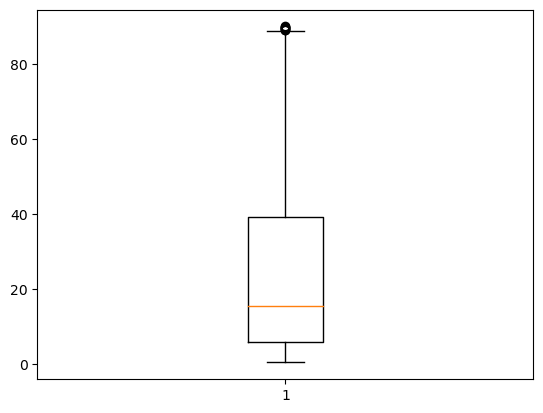

In [271]:
plt.boxplot(df_remo_outlier["Emissions.Production.CH4"])

In [272]:
df_remo_outlier.shape

(2090, 20)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa5c0d0ecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa5c0d1a2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa5c0d0ea00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa5c0d1a850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa5c0d1ab20>],
 'means': []}

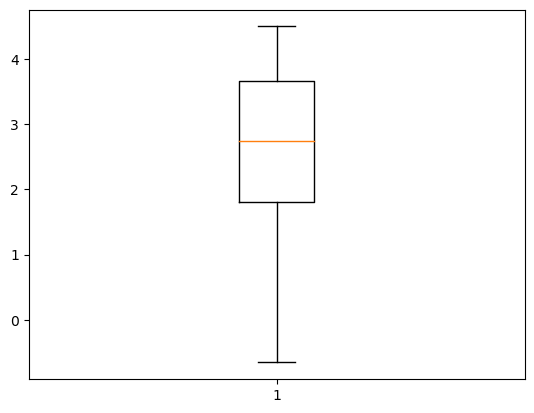

In [273]:
plt.boxplot(np.log(df_remo_outlier["Emissions.Production.CH4"]))

In [274]:
df_remo_outlier_corr=df_remo_outlier.corr()

In [275]:
df_remo_outlier_corr

,Year,Country.GDP,Country.Population,Emissions.Production.CH4,Emissions.Production.N2O,Emissions.Production.CO2.Cement,Emissions.Production.CO2.Coal,Emissions.Production.CO2.Gas,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
Year,1.000000,0.138996,0.048613,0.007334,0.000165,0.070806,0.041616,0.110720,-0.010687,0.028436,0.026672,0.040110,-0.125959,-0.053928,-0.001789,-0.056396,-0.055723,-0.056981
Country.GDP,0.138996,1.000000,0.662155,0.401597,0.633108,0.734695,0.720742,0.819121,0.928394,0.131343,0.853647,0.926477,0.674923,0.678527,0.779345,0.899121,0.118090,0.882161
Country.Population,0.048613,0.662155,1.000000,0.720380,0.733384,0.665406,0.519485,0.540171,0.606428,0.045534,0.501623,0.631406,0.609446,0.501804,0.525025,0.592409,0.041833,0.611416
Emissions.Production.CH4,0.007334,0.401597,0.720380,1.000000,0.737840,0.426740,0.346125,0.492606,0.394835,0.363667,0.254895,0.449900,0.385622,0.348270,0.503694,0.389874,0.361367,0.447726
Emissions.Production.N2O,0.000165,0.633108,0.733384,0.737840,1.000000,0.517539,0.522752,0.587588,0.577304,0.252460,0.599806,0.629792,0.502090,0.538421,0.606633,0.574630,0.258137,0.636537
Emissions.Production.CO2.Cement,0.070806,0.734695,0.665406,0.426740,0.517539,1.000000,0.598038,0.591490,0.764010,0.026208,0.685376,0.757553,0.918669,0.584789,0.580547,0.756181,0.024511,0.746269
Emissions.Production.CO2.Coal,0.041616,0.720742,0.519485,0.346125,0.522752,0.598038,1.000000,0.580669,0.685250,0.129009,0.785482,0.877154,0.555155,0.970735,0.570823,0.666688,0.128571,0.848893
Emissions.Production.CO2.Gas,0.110720,0.819121,0.540171,0.492606,0.587588,0.591490,0.580669,1.000000,0.773052,0.265433,0.716788,0.835597,0.516989,0.548240,0.977203,0.745975,0.258954,0.796218
Emissions.Production.CO2.Oil,-0.010687,0.928394,0.606428,0.394835,0.577304,0.764010,0.685250,0.773052,1.000000,0.163633,0.820860,0.934327,0.795300,0.690711,0.788043,0.995154,0.168849,0.940410
Emissions.Production.CO2.Flaring,0.028436,0.131343,0.045534,0.363667,0.252460,0.026208,0.129009,0.265433,0.163633,1.000000,0.154912,0.202921,0.025153,0.130195,0.274284,0.160838,0.975472,0.201077


In [276]:
df_remo_outlier_corr["Emissions.Production.CH4"]

Year                                  0.007334
Country.GDP                           0.401597
Country.Population                    0.720380
Emissions.Production.CH4              1.000000
Emissions.Production.N2O              0.737840
Emissions.Production.CO2.Cement       0.426740
Emissions.Production.CO2.Coal         0.346125
Emissions.Production.CO2.Gas          0.492606
Emissions.Production.CO2.Oil          0.394835
Emissions.Production.CO2.Flaring      0.363667
Emissions.Production.CO2.Other        0.254895
Emissions.Production.CO2.Total        0.449900
Emissions.Global Share.CO2.Cement     0.385622
Emissions.Global Share.CO2.Coal       0.348270
Emissions.Global Share.CO2.Gas        0.503694
Emissions.Global Share.CO2.Oil        0.389874
Emissions.Global Share.CO2.Flaring    0.361367
Emissions.Global Share.CO2.Total      0.447726
Name: Emissions.Production.CH4, dtype: float64

In [277]:
house_train_num_cols = []
house_train_num_cols.extend(df_remo_outlier_corr[(df_remo_outlier_corr["Emissions.Production.CH4"]>0.3) ].index.values)
house_train_num_cols.extend(df_remo_outlier_corr[(df_remo_outlier_corr["Emissions.Production.CH4"]<-0.5) ].index.values)

In [278]:
house_train_num_cols

['Country.GDP',
 'Country.Population',
 'Emissions.Production.CH4',
 'Emissions.Production.N2O',
 'Emissions.Production.CO2.Cement',
 'Emissions.Production.CO2.Coal',
 'Emissions.Production.CO2.Gas',
 'Emissions.Production.CO2.Oil',
 'Emissions.Production.CO2.Flaring',
 'Emissions.Production.CO2.Total',
 'Emissions.Global Share.CO2.Cement',
 'Emissions.Global Share.CO2.Coal',
 'Emissions.Global Share.CO2.Gas',
 'Emissions.Global Share.CO2.Oil',
 'Emissions.Global Share.CO2.Flaring',
 'Emissions.Global Share.CO2.Total']

In [279]:
data_number_num_col_filtered=data_number[house_train_num_cols]

In [280]:
(data_number.isnull().sum().sort_values(ascending=False))

Year                                  0
Country.GDP                           0
Emissions.Global Share.CO2.Flaring    0
Emissions.Global Share.CO2.Oil        0
Emissions.Global Share.CO2.Gas        0
Emissions.Global Share.CO2.Coal       0
Emissions.Global Share.CO2.Cement     0
Emissions.Production.CO2.Total        0
Emissions.Production.CO2.Other        0
Emissions.Production.CO2.Flaring      0
Emissions.Production.CO2.Oil          0
Emissions.Production.CO2.Gas          0
Emissions.Production.CO2.Coal         0
Emissions.Production.CO2.Cement       0
Emissions.Production.N2O              0
Emissions.Production.CH4              0
Country.Population                    0
Emissions.Global Share.CO2.Total      0
dtype: int64

# ANother way

/Users/abhishekbarandoorujanavejirao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emissions.Production.CH4'>

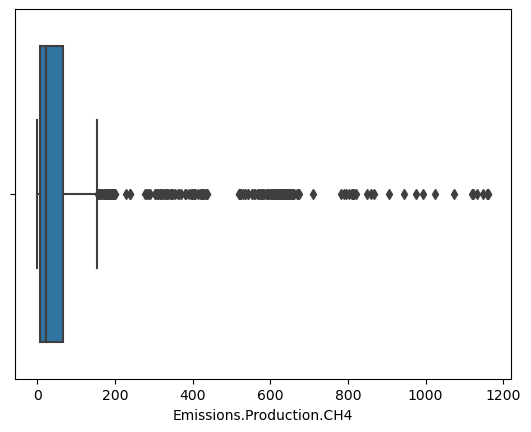

In [39]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Emissions.Production.CH4'])

# Find Outliers in Data
https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

In [223]:
#import dependencies

import pandas as pd

import numpy as np

import plotly.express as px

In [224]:
#load the data into a dataframe

df = pd.read_csv('global_emissions.csv')

#check the first 5 rows

df.head()

,Year,Country.Name,Country.Code,Country.GDP,Country.Population,Emissions.Production.CH4,Emissions.Production.N2O,Emissions.Production.CO2.Cement,Emissions.Production.CO2.Coal,Emissions.Production.CO2.Gas,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
0,1992,Afghanistan,AFG,1.267754e+10,14485543,7.13,2.89,0.046,0.022,0.363,0.927,0.022,0.000000e+00,1.379,0.01,0.0,0.01,0.01,0.01,0.01
1,1993,Afghanistan,AFG,9.834581e+09,15816601,7.21,2.93,0.047,0.018,0.352,0.894,0.022,0.000000e+00,1.333,0.01,0.0,0.01,0.01,0.01,0.01
2,1994,Afghanistan,AFG,7.919857e+09,17075728,7.47,2.76,0.047,0.015,0.338,0.860,0.022,2.220446e-16,1.282,0.01,0.0,0.01,0.01,0.01,0.01
3,1995,Afghanistan,AFG,1.230753e+10,18110662,7.83,2.88,0.047,0.015,0.322,0.824,0.022,2.220446e-16,1.230,0.01,0.0,0.01,0.01,0.01,0.01
4,1996,Afghanistan,AFG,1.207013e+10,18853444,8.67,3.12,0.047,0.007,0.308,0.780,0.022,1.000000e-03,1.165,0.01,0.0,0.01,0.01,0.01,0.00


In [225]:
#drop the unnecessary columns

df = df.drop(columns=(['Country.GDP', 'Country.Population']))

In [226]:
df

,Year,Country.Name,Country.Code,Emissions.Production.CH4,Emissions.Production.N2O,Emissions.Production.CO2.Cement,Emissions.Production.CO2.Coal,Emissions.Production.CO2.Gas,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
0,1992,Afghanistan,AFG,7.13,2.89,0.046,0.022,0.363,0.927,0.022,0.000000e+00,1.379,0.01,0.00,0.01,0.01,0.01,0.01
1,1993,Afghanistan,AFG,7.21,2.93,0.047,0.018,0.352,0.894,0.022,0.000000e+00,1.333,0.01,0.00,0.01,0.01,0.01,0.01
2,1994,Afghanistan,AFG,7.47,2.76,0.047,0.015,0.338,0.860,0.022,2.220446e-16,1.282,0.01,0.00,0.01,0.01,0.01,0.01
3,1995,Afghanistan,AFG,7.83,2.88,0.047,0.015,0.322,0.824,0.022,2.220446e-16,1.230,0.01,0.00,0.01,0.01,0.01,0.01
4,1996,Afghanistan,AFG,8.67,3.12,0.047,0.007,0.308,0.780,0.022,1.000000e-03,1.165,0.01,0.00,0.01,0.01,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2014,Vietnam,VNM,84.93,23.48,32.694,70.517,19.599,46.196,0.000,0.000000e+00,169.006,2.19,0.47,0.29,0.40,0.00,0.48
2480,2015,Vietnam,VNM,83.85,25.91,34.298,83.191,20.463,55.052,0.000,0.000000e+00,193.004,2.39,0.57,0.30,0.46,0.00,0.54
2481,2016,Vietnam,VNM,81.85,24.82,36.822,81.561,20.368,54.015,0.000,0.000000e+00,192.766,2.49,0.57,0.29,0.45,0.00,0.54
2482,2017,Vietnam,VNM,81.28,24.89,42.735,77.680,17.877,56.957,0.000,0.000000e+00,195.249,2.85,0.54,0.25,0.47,0.00,0.54


In [227]:
df_1992 = df.loc[df['Year'] == 1992]

In [228]:
df_1992

,Year,Country.Name,Country.Code,Emissions.Production.CH4,Emissions.Production.N2O,Emissions.Production.CO2.Cement,Emissions.Production.CO2.Coal,Emissions.Production.CO2.Gas,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
0,1992,Afghanistan,AFG,7.13,2.89,0.046,0.022,0.363,0.927,0.022,0.000000e+00,1.379,0.01,0.00,0.01,0.01,0.01,0.01
27,1992,Albania,ALB,3.42,1.11,0.081,0.800,0.198,1.416,0.000,4.440892e-16,2.495,0.02,0.01,0.01,0.02,0.00,0.01
54,1992,Algeria,DZA,54.14,4.87,2.998,2.378,31.932,28.678,13.898,0.000000e+00,79.883,0.56,0.03,0.81,0.31,5.86,0.35
81,1992,Angola,AGO,28.95,21.18,0.123,0.000,1.066,2.290,1.685,0.000000e+00,5.164,0.02,0.00,0.03,0.02,0.71,0.02
108,1992,Argentina,ARG,111.32,36.54,2.495,2.803,48.303,63.633,3.997,0.000000e+00,121.231,0.47,0.03,1.22,0.69,1.68,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,1992,United States,USA,655.71,244.63,32.993,1850.697,1091.239,2128.090,40.963,2.349900e+01,5167.481,6.17,21.95,27.54,23.16,17.26,22.90
2376,1992,Uruguay,URY,19.92,7.15,0.226,0.004,0.000,4.913,0.000,0.000000e+00,5.143,0.04,0.00,0.00,0.05,0.00,0.02
2403,1992,Uzbekistan,UZB,33.52,9.47,2.493,9.692,76.848,21.952,0.000,0.000000e+00,110.984,0.47,0.11,1.94,0.24,0.00,0.49
2430,1992,Venezuela,VEN,143.94,11.26,2.974,1.231,19.339,73.771,8.262,0.000000e+00,105.577,0.56,0.01,0.49,0.80,3.48,0.47


In [229]:
df.describe()[['Emissions.Production.CO2.Total', 'Emissions.Global Share.CO2.Total']]

,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Total
count,2484.000000,2484.000000
mean,300.077331,1.020688
std,939.940620,3.089116
min,0.758000,0.000000
25%,21.525250,0.080000
50%,60.908000,0.220000
75%,220.066000,0.722500
max,10289.989000,28.210000


In [230]:
df.describe()

,Year,Emissions.Production.CH4,Emissions.Production.N2O,Emissions.Production.CO2.Cement,Emissions.Production.CO2.Coal,Emissions.Production.CO2.Gas,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,2005.000000,71.834473,24.555829,10.616455,123.146344,58.088311,102.178861,3.370653,2.676818,300.077331,1.048998,1.059952,1.061023,0.951912,1.072999,1.020688
std,7.790449,150.453654,58.642876,53.019713,573.823617,158.775012,271.814395,7.851043,12.952656,939.940620,4.461195,4.545482,2.948671,2.537069,2.428396,3.089116
min,1992.000000,0.520000,0.110000,0.000000,0.000000,0.000000,0.366000,0.000000,0.000000,0.758000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1998.000000,7.460000,2.550000,0.542750,0.310250,2.552750,8.946750,0.000000,0.000000,21.525250,0.060000,0.000000,0.050000,0.080000,0.000000,0.080000
50%,2005.000000,22.835000,7.490000,1.830000,7.394000,12.499500,29.233000,0.241000,0.001000,60.908000,0.190000,0.060000,0.240000,0.280000,0.070000,0.220000
75%,2012.000000,66.032500,21.882500,6.286500,41.941750,55.053250,73.189500,2.583250,1.054000,220.066000,0.620000,0.360000,1.010000,0.690000,0.790000,0.722500
max,2018.000000,1161.420000,552.670000,786.745000,7493.455000,1641.041000,2608.477000,76.211000,171.537000,10289.989000,52.750000,49.930000,28.340000,24.010000,18.020000,28.210000


In [231]:
#create a histogram

fig = px.histogram(df, x='Emissions.Production.CO2.Total')

fig.show()

In [232]:
#create a box plot

fig = px.box(df, y='Emissions.Production.CO2.Total')

fig.show()

In [233]:
#Use px.scatter() 

fig = px.scatter(x=df['Emissions.Global Share.CO2.Total'], y=df['Emissions.Production.CO2.Total'])

fig.show()

In [234]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)
 
    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [235]:
outliers = find_outliers_IQR(df['Emissions.Production.CO2.Total'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 240
max outlier value: 10289.989
min outlier value: 521.278


399      532.418
400      557.901
401      529.353
437      521.278
438      528.987
          ...   
2371    5522.807
2372    5371.771
2373    5248.024
2374    5207.751
2375    5375.491
Name: Emissions.Production.CO2.Total, Length: 240, dtype: float64

In [236]:
outliers = find_outliers_IQR(df[['Emissions.Global Share.CO2.Total','Emissions.Production.CO2.Total']])

outliers

,Emissions.Global Share.CO2.Total,Emissions.Production.CO2.Total
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
2479,NaN,NaN
2480,NaN,NaN
2481,NaN,NaN
2482,NaN,NaN


In [237]:
outliers.shape

(2484, 2)

In [238]:
def drop_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)
 
    IQR=q3-q1
 
    not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
 
    outliers_dropped = outliers.dropna().reset_index()
 
    return outliers_dropped

In [239]:
drop_outliers_IQR(df)

/var/folders/8v/x5wpqfrj75z_n1t_mwpy_8vm0000gn/T/ipykernel_17599/975314281.py:9: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



,index,Emissions.Global Share.CO2.Total,Emissions.Production.CO2.Total
0,437,2.15,521.278
1,438,2.19,528.987
2,439,2.22,543.730
3,440,2.25,566.552
4,441,2.20,559.042
...,...,...,...
212,2371,15.54,5522.807
213,2372,15.13,5371.771
214,2373,14.80,5248.024
215,2374,14.50,5207.751


In [240]:
upper_limit = df['Emissions.Production.CO2.Total'].mean() + 3*df['Emissions.Production.CO2.Total'].std()

print(upper_limit)

lower_limit = df['Emissions.Production.CO2.Total'].mean() - 3*df['Emissions.Production.CO2.Total'].std()

print(lower_limit)

# Based on our calculated limits, any outliers above 41.06 will be set to 41.06. Likewise, any outlier below -18.34 will be set to -18.34. 

# After calculating the upper and lower limit, we use the numpy .where() function to apply the limits to fare_amount. 


3119.899190140704
-2519.744527499803


In [241]:

df['Emissions.Production.CO2.Total'] = np.where(df['Emissions.Production.CO2.Total'] > upper_limit,

   upper_limit,

   np.where(

       df['Emissions.Production.CO2.Total'] < lower_limit,

       lower_limit,

       df['Emissions.Production.CO2.Total']

   )

)



In [242]:
df_new = df['Emissions.Production.CO2.Total']

In [243]:
df_new

0         1.379
1         1.333
2         1.282
3         1.230
4         1.165
         ...   
2479    169.006
2480    193.004
2481    192.766
2482    195.249
2483    223.718
Name: Emissions.Production.CO2.Total, Length: 2484, dtype: float64

In [244]:
df.describe()[['Emissions.Production.CO2.Total']]

,Emissions.Production.CO2.Total
count,2484.000000
mean,238.310559
std,517.285322
min,0.758000
25%,21.525250
50%,60.908000
75%,220.066000
max,3119.899190


In [245]:
# fig = px.box(df, y='Emissions.Production.CO2.Total')

# fig.show()

In [246]:
def impute_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    upper = df[~(df>(q3+1.5*IQR))].max()

    lower = df[~(df<(q1-1.5*IQR))].min()

    df = np.where(df > upper,

        df.mean(),

        np.where(

            df < lower,

            df.mean(),

            df

            )

        )

    return df

In [247]:
df.describe()['Emissions.Production.CO2.Total']

count    2484.000000
mean      238.310559
std       517.285322
min         0.758000
25%        21.525250
50%        60.908000
75%       220.066000
max      3119.899190
Name: Emissions.Production.CO2.Total, dtype: float64

In [248]:
df = df.describe()['Emissions.Production.CO2.Total']

In [249]:
df

count    2484.000000
mean      238.310559
std       517.285322
min         0.758000
25%        21.525250
50%        60.908000
75%       220.066000
max      3119.899190
Name: Emissions.Production.CO2.Total, dtype: float64

In [161]:
fig = px.box(df, y='Emissions.Production.CO2.Total')

fig.show()

In [189]:
df

count    2484.000000
mean      238.310559
std       517.285322
min         0.758000
25%        21.525250
50%        60.908000
75%       220.066000
max      3119.899190
Name: Emissions.Production.CO2.Total, dtype: float64